In [433]:
username = "nova"
pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
using Pkg
Pkg.activate(pathtorepo * "/env/integrate/")

using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding 
using CairoMakie, GLMakie

include("/home/nova/work/repo_ds/dynamical-systems/system.jl")
include("/home/nova/work/repo_ds/dynamical-systems/visual.jl")

  Activating project at `~/work/repo_ds/dynamical-systems/env/integrate`


plot_3d_2c_fp (generic function with 1 method)

In [434]:
"""username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding 
using CairoMakie, GLMakie

include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual.jl");"""

"username = \"Alex\"\npathtorepo = \"C:\\Users\\\" *username *  \"\\Desktop\\\"\nusing Pkg\nPkg.activate(pathtorepo * \"dynamical-systems\\env\\integrate\\\")\n\nusing StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding \nusing CairoMakie, GLMakie\n\ninclude(\"C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl\");\ninclude(\"C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual.jl\");"

In [435]:
time = 3000.0; tt = 0.0; tstep = 0.001;
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [436]:
param = TM6_glial_ECM_get_params();
dict, indexparams = TM6_glial_ECM_help(param);
println(indexparams);


    τ - 1, τD - 2, τF - 3, τy - 4, α - 5, αE - 6, αecm - 7, αp - 8,
    J - 9, U0 - 10, I0 - 11, ΔU0 - 12, β - 13, βecm  -14, βp - 15,
    γp - 16, ecm0 - 17, ecm1 - 18, kecm - 19, θecm - 20, p0 - 21, p1 - 22, θp - 23, kp - 24, ythr - 25, xthr - 26


In [483]:
param[11] =  -1.741;
param[6] = 0.079;

In [447]:
u01 = [9.14254621711287, 0.4728356336752635, 0.812973494562497, 0.00015354226088440916, 0.011754986871793258, 9.336776461192295e-8];
u02 = [0.9797943736661366, 0.7794327088542368, 0.7119708000464434, 0.09148742248483342, 0.00046942167029955466, 2.1991049918311905e-10];

# limit cycle alphaE = 2.0
u0cycle = [1.668166906355378, 0.7484865976124638, 0.7564748190249675, 0.011454958034401047, 0.09401327202294595, 0.10214817778597438];

# limit cycle alphaE = 0.15
u0cycle = [20.346249379408327, 0.6219997172535287, 0.7065074025109187, 0.07032127270134884, 0.09470523646031559, 0.019898111932375978];

In [490]:
# alphaE = 0.079
# [2.8071008346857926, 0.8341241892758217, 0.6708699040400408, 0.07385790173579333, 0.13783664318491548, 0.0040352358173942286]
# [1.04236193630539, 0.8071554474465472, 0.6980379867403658, 0.0950622075910132, 0.00012420059276342765, 1.0254422706075149e-12]

[2.8071008346857926, 0.8341241892758217, 0.6708699040400408, 0.07385790173579333, 0.13783664318491548, 0.0040352358173942286]


In [492]:
ds= CoupledODEs(TM6_glial_ECM, [2.8071008346857926, 0.8341241892758217, 0.6708699040400408, 0.07385790173579333, 0.13783664318491548, 0.0040352358173942286], param, diffeq = integ_set);
tr, trange = trajectory(ds, time, Δt = tstep);
ds_nh = CoupledODEs(TM6_glial_ECM, [1.04236193630539, 0.8071554474465472, 0.6980379867403658, 0.0950622075910132, 0.00012420059276342765, 1.0254422706075149e-12], param, diffeq = integ_set);
trnh, trangenh = trajectory(ds_nh, time, Δt = tstep);

In [493]:
Er = interval(0.0, 30.0);
xr, ur, yr = interval(-1.0, 1.0), interval(-1.0, 1.0), interval(-1.0, 1.0);
ecmr, pr = interval(-1.0, 1.0), interval(-1.0, 1.0);
box = IntervalBox(Er, xr, ur, yr, ecmr, pr);

fp, eigs, stable = fixedpoints(ds, box, TM6_glial_ECM_jac, tol = 1e-15, method = IntervalRootFinding.Krawczyk);
println("Number of fp:", length(fp));

Number of fp:3


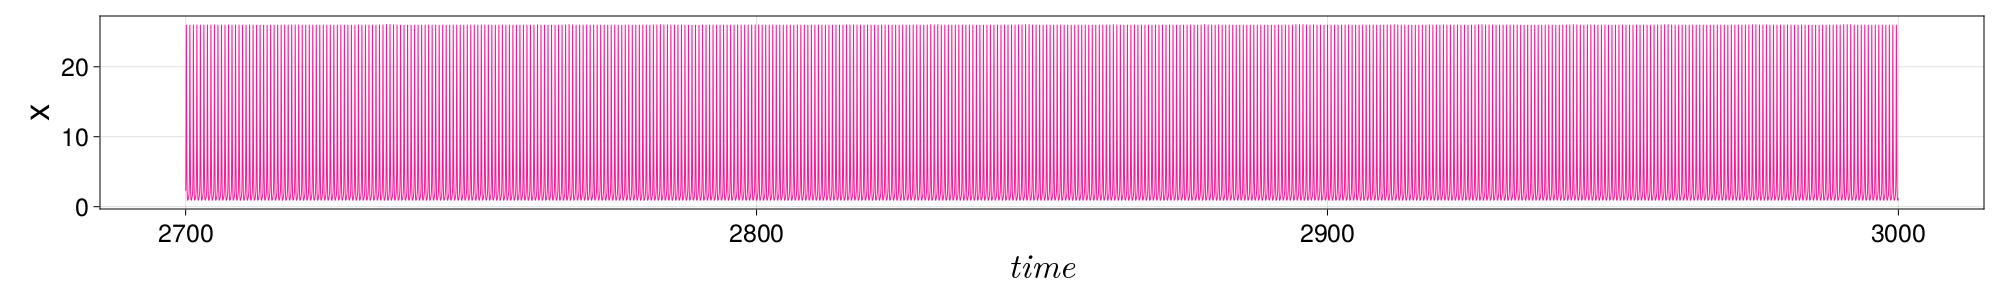

CairoMakie.Screen{IMAGE}


In [494]:
plot_timesereis(trange, tr[:, 1], 2700000, 3000000, width = 2000, height = 300, inter=false, lw = 1.0, color = :deeppink)

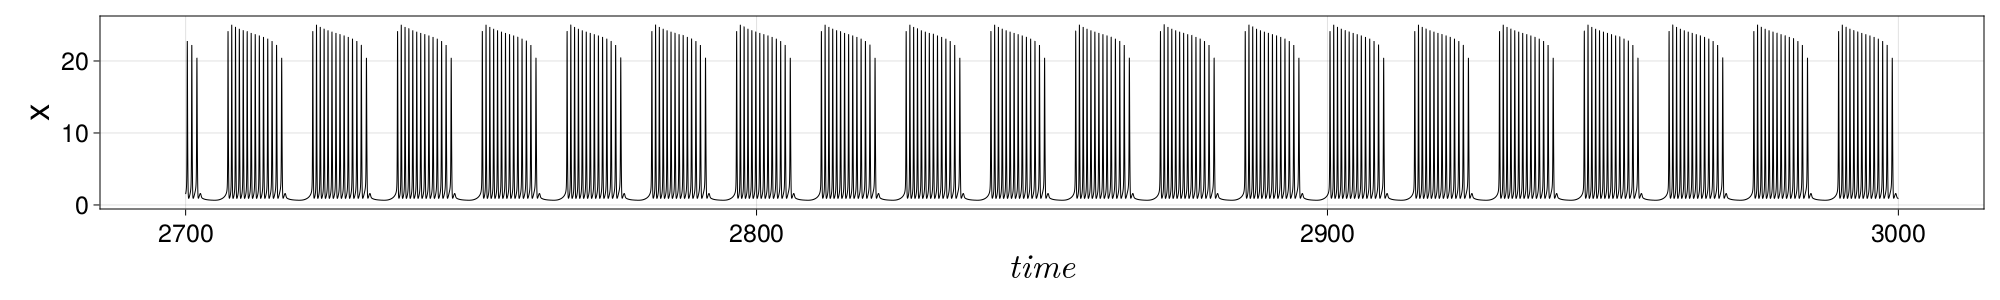

CairoMakie.Screen{IMAGE}


In [495]:
plot_timesereis(trangenh, trnh[:, 1], 2700000, 3000000, width = 2000, height = 300, inter=false, lw = 1.0, color = :black)

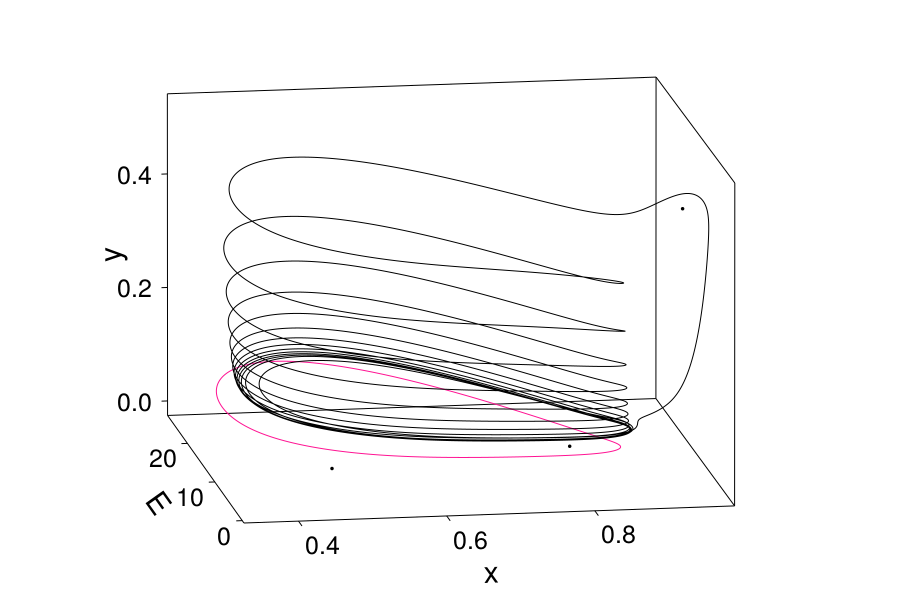

In [496]:
idx, idy, idz = 2, 1, 4;
data = [ tr[:, idx], trnh[:, idx], tr[:, idy], trnh[:, idy], tr[:, idz], trnh[:, idz]];
plot_3d_2c_fp(data, [fp, idx, idy, idz], 2700000, 3000000; prot = 60, azim = -0.55pi, elev = 0.07pi,  xl = "x", yl = "E", zl = "y", lw = 1.0, color1 = :deeppink, color2 = :black);

In [444]:
"""idx, idy, idz = 2, 3, 1
data = [ tr[:, idx], tr[:, idy], tr[:, idz] ]
plot_3d_fp(data, [fp, idx, idy, idz], 2500000, 3000000; prot = 60, azim = -0.55pi, elev = 0.07pi,  xl = "x", yl = "u", zl = "E", lw = 1.0, color = :deeppink)"""
;

In [445]:
"""width_ = 300; height_ = 300;
CairoMakie.activate!();
f = Figure(resolution = (width_, height_) );
ax = Axis(f[1, 1], xlabel = L"Re", ylabel = L"Im");
for index in range(1, length(eigs), step = 1)
    Re = real(eigs[index]);
    Im = imag(eigs[index]);
    scatter!(Re, Im, markersize = 3.5, color = :black);
end
display(f)"""

"width_ = 300; height_ = 300;\nCairoMakie.activate!();\nf = Figure(resolution = (width_, height_) );\nax = Axis(f[1, 1], xlabel = L\"Re\", ylabel = L\"Im\");\nfor index in range(1, length(eigs), step = 1)\n    Re = real(eigs[index]);\n    Im = imag(eigs[index]);\n    scatter!(Re, Im, markersize = 3.5, color = :black);\nend\ndisplay(f)"